<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Эмиль! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на "ты" 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).


Вижу, что ты очень старался, делая проект. Все ключевые этапы в работе выполнены, и в целом с проектом ты справился. 
    
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Можно учесть эти комментарии при выполнении будущих заданий или доработать текущий проект (однако это не обязательно). 

<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы "со звездочкой", которые помогут в будущем.

    
Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/thumbs-up.png" align=left width=44, heigth=44>
<div style="background-color:lightblue">
<span style="color:green">    
<b>Привет, Дмитрий!</b> 
<p>Cпасибо за проверку моей работы и дельные советы! Беру на вооружение и мотаю на ус!<br><br> Кроме этого комментария правок больше не вносил 😉</p>
</span>    
</div>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Описание данных

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. 

Известно:
* сalls — количество звонков,
* minutes — суммарная длительность звонков в минутах,
* messages — количество sms-сообщений,
* mb_used — израсходованный интернет-трафик в Мб,
* is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).


## Импортируем необходимые библиотеки

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

from sklearn.metrics import accuracy_score

from IPython.display import Audio





In [8]:
wave = np.sin(2*np.pi*400*np.arange(10000*2)/10000)

In [9]:
Audio(wave, rate=10000, autoplay=True)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

## Откройте и изучите файл

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Можно дополнительно посмотреть информацию о данных с помощью метода .info()
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Данные загружены и исследованы.</div>

## Разбейте данные на выборки

In [5]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

Разделим исходные данные на обучающую, валидационную и тестовую выборки. Поскольку спрятанной тестовой выборки у нас нет - разобьем данные три части в пропорции 60% для обучающей выборки и по 20% валидационной и тестовой выборки.

In [6]:
#выделим 40% данных в тестовую выборку.
(features_train, features_test, target_train, target_test) = train_test_split(
    features, target, test_size = 0.4, random_state =12345)

#разделим тестовую выборку пополам на тестовую и валидационную

(features_valid, features_test, target_valid, target_test) = train_test_split(
    features_test, target_test, test_size = 0.5, random_state=12345)



<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец, корректно разделил данные на три выборки.
На будущее, обрати внимание на аргумент stratify функции train_test_split. Стратификация особенно важна, когда у нас мало данных и возможен дисбаланс классов в обучении / валидации / тесте.
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Рекомендую явно вывести размеры получившихся выборок (с использованием .shape и print), это поможет быстро оценить корректность разделения на выборки.
</div>

## Исследуйте модели

### Логистическая регрессия:

In [7]:
%%time

LR = LogisticRegression(random_state = 12345, solver = 'lbfgs', max_iter= 1000)
LR.fit(features_train,target_train)
prediction_valid_LR = LR.predict(features_valid)
accuracy_LR = accuracy_score(prediction_valid_LR, target_valid)



CPU times: user 25.3 ms, sys: 0 ns, total: 25.3 ms
Wall time: 24.4 ms


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Логистическая регрессия исследована корректно.
</div>


### Случайный лес:

In [8]:
%%time

best_RF = None
best_accuracy_RF = 0
best_est_RF = 0
best_depth_RF = 0
for est in range(2,51):
    for depth in range(2,25):
        RF = RandomForestClassifier(random_state=12345, n_estimators = est, max_depth = depth)
        RF.fit(features_train,target_train)
        prediction_valid_RF = RF.predict(features_valid)
        accuracy_RF = accuracy_score(prediction_valid_RF, target_valid)
        if best_accuracy_RF < accuracy_RF:
            best_RF = RF
            best_depth_RF = depth
            best_est_RF = est
            best_accuracy_RF = accuracy_RF
            


CPU times: user 1min 38s, sys: 481 ms, total: 1min 38s
Wall time: 1min 38s


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Случайный лес исследован корректно:
    
 - исследовано 49х23 комбинаций значений гиперпараметров
 - модель обучена на обучающем наборе
 - получена оценка качества на валидационном наборе
 - перебор гиперпараметров осуществляется в цикле
</div>

In [9]:
print(f"Протестировав атоматическим образом различные гиперпараметры для модели Случайный лес, мы выяснили, что оптимальным количеством деревьев является {best_est_RF} штук, а оптимальная глубина - {best_depth_RF}. При таких гиперпараметрах модель дает максимальную точность.")

Протестировав атоматическим образом различные гиперпараметры для модели Случайный лес, мы выяснили, что оптимальным количеством деревьев является 40 штук, а оптимальная глубина - 8. При таких гиперпараметрах модель дает максимальную точность.


### Дерево решений:

In [10]:
%%time

best_DT = None
best_accuracy_DT = 0
best_depth_DT = 0
for depth in range(2, 50):
    DT = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    DT.fit(features_train, target_train)
    prediction_valid_DT = DT.predict(features_valid)
    accuracy_DT = accuracy_score(prediction_valid_DT, target_valid)
    if best_accuracy_DT < accuracy_DT:
        best_DT = DT
        best_accuracy_DT = accuracy_DT
        best_depth_DT = depth

       

CPU times: user 429 ms, sys: 3.97 ms, total: 433 ms
Wall time: 443 ms


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Дерево решений исследовано корректно:
    
 - исследовано 48 значений гиперпараметров
 - модель обучена на обучающем наборе
 - получена оценка качества на валидационном наборе
 - перебор гиперпараметров осуществляется в цикле
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Нет смысла исследовать такие глубокие деревья. Максимальное количество листьев в деревьях растет экспоненциально от глубины по формуле  2**(N-1) и при глубине 12 такое дерево теоретически уже может запомнить всю выборку. Конечно, на практике не все ветви дерева дотягивают до максимальной глубины, но дерево глубиной 25 уже запоминает всю выборку. Поэтому деревья глубиной 25-50 это одно.
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Рекомендую посмотреть как при изменении гиперпараметров меняется точность на обучающем и валидационых наборах. Для этого с помощью print() выводи эти метрики на каждом шагу цикла. Также уместно использовать графики.
</div>

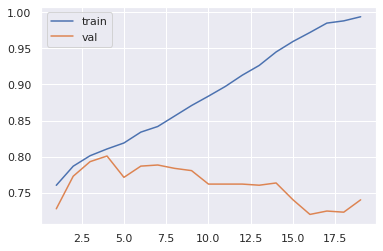

In [11]:
print(f"Протестировав атоматическим образом различные гиперпараметры для модели Дерево решений, мы выяснили, что оптимальная глубина - {best_depth_DT}. При таких гиперпараметрах модель дает максимальную точность.")

Протестировав атоматическим образом различные гиперпараметры для модели Дерево решений, мы выяснили, что оптимальная глубина - 3. При таких гиперпараметрах модель дает максимальную точность.


### Сравним модели:

In [12]:
print(f"Логистическая регрессия: {accuracy_LR}")
print(f"Случайный лес: {best_accuracy_RF}")
print(f"Дерево решений: {best_accuracy_DT}")

Логистическая регрессия: 0.7107309486780715
Случайный лес: 0.8087091757387247
Дерево решений: 0.7853810264385692


### Вывод:

Наибольшую точность продемонстрировала модель Случайный лес, со следующими гиперпараметрами: 40 деревьев, с глубиной 8.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец, есть выводы, и выбрана лучшая модель, включая гиперпараметры!
</div>


## Проверьте модель на тестовой выборке

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
К данному этапу лучше подходить с одной выбранной моделью (ты это сделал). Чтобы избежать искушения вдруг "поменять" модель по  результатам тестирования. Ведь любое использование тестовой выборки для улучшения модели (в том числе для выбора лучшей модели) - это нарушение.</div>

In [15]:
prediction_test_LR = LR.predict(features_test)
prediction_test_RF = best_RF.predict(features_test)
prediction_test_DT = best_DT.predict(features_test)

accuracy_LR_test = accuracy_score(prediction_test_LR, target_test)
accuracy_RF_test = accuracy_score(prediction_test_RF, target_test)
accuracy_DT_test = accuracy_score(prediction_test_DT, target_test)

print(f"Логистическая регрессия: {accuracy_LR_test}")
print(f"Случайный лес: {accuracy_RF_test}")
print(f"Дерево решений: {accuracy_DT_test}")


Логистическая регрессия: 0.6842923794712286
Случайный лес: 0.7962674961119751
Дерево решений: 0.7791601866251944


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец: 
    
  - выбрана лучшая модель
  - тестирование произведено корректно 
  - достигнута хорошая точность на тестовой выборке
</div>


## Вывод

В результате проверки различных моделей на валидационной и тестовой выборках мы установиили, что наиболее точные предсказания делает модель Случайный лес. Минимальные требования точности в 0.75 превышены.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

## (бонус) Проверьте модели на адекватность

Для проверки модели возьмем самый простой классификатор, который выдаёт на каждом объекте константное предсказание – самый часто встречающийся класс.

In [14]:
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=0)
dummy_clf.fit(features_train, target_train)
dummy_clf.score(features_train, target_train)

0.6924273858921162

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Молодец, верно применен Dummy Classifier для оценки стратегии предсказания самого частого ответа.</div>

Наша модель-победитель демонстрирует более высокую точность, чем рандом или чем простейшая модель.
Следовательно, модель-победитель - адекватна.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75


<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

В целом мне все понравилось: твоя работа выполнена на хорошем уровне с минимальными помарками.
Также работа выглядит аккуратной и хорошо оформленной.
Вижу, что тебе дается python, и инструментарий машинного обучения.
 
    
У меня нет критичных замечаний к твоей работе. Проект может быть принят уже сейчас. Возвращаю проект чтобы дать тебе возможность ознакомиться с моими комментариями, возможно у тебя возникнет желание задать вопросы или внести корректировки в проект.
     
Жду твой проект на финальное ревью :)
</div>